In [23]:
from scipy.special import gammaincc, gamma, erf, exp1
from matplotlib import pyplot as plt
from funciones import *
from numpy import pi
import numpy as np
from numpy import exp, sqrt
import tqdm

In [28]:
y = generar_lineas(n_lines = 10**5, N = 10**4, y0 = 0, yN = 0)
delta = (y.max(axis = 1) - y.min(axis = 1))

In [25]:
def fuerza_casimir(a,m,delta):
    
    primer_termino  = m**2  *exp1(a**2 * m**2 / delta**2) / (8 * pi)
    segundo_termino = - delta**2 * np.exp(-a**2 * m**2 / delta**2) / (8 * a**2 * pi)
    
    return primer_termino + segundo_termino

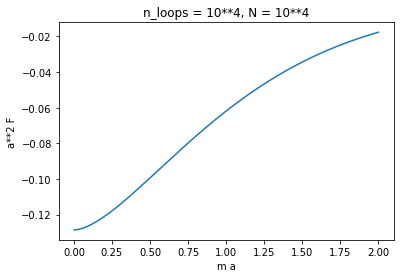

In [29]:
masas_lineal = np.linspace(0.001,2,1000)
casimir_fuerza_lista_lineal = []

for masa in masas_lineal:
    casimir_fuerza_lista_lineal.append(fuerza_casimir(1,masa,delta).mean())

casimir_fuerza_lista_lineal = np.array(casimir_fuerza_lista_lineal)

plt.plot(masas_lineal, casimir_fuerza_lista_lineal)

plt.xscale('linear')
plt.xlabel('m a')
plt.ylabel('a**2 F')
plt.title('n_loops = 10**4, N = 10**4')
plt.show()

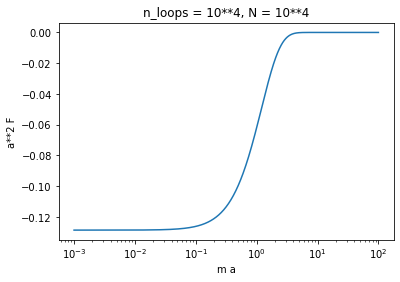

In [36]:
masas_log = np.logspace(-3,2,1000)
casimir_fuerza_lista_log = []

for masa in masas_log:
    casimir_fuerza_lista_log.append(fuerza_casimir(1,masa,delta).mean())


plt.plot(masas_log, casimir_fuerza_lista_log)

plt.xscale('log')
plt.xlabel('m a')
plt.ylabel('a**2 F')
plt.title('n_loops = 10**4, N = 10**4')
plt.show()

# Para el regimen chico se comporta bien?

In [6]:
def limite_inferior(masa):
    return - pi / 24 + masa**2 / (24*pi)

In [15]:
masas_bajas = masas_lineal[masas_lineal < 10**-1]

In [16]:
casimir_fuerza_lista_lineal_baja =casimir_fuerza_lista_lineal[masas_lineal < 10**-1]
casimir_exacto_lista_lineal_baja = limite_inferior(masas_lineal[masas_lineal < 10**-1])

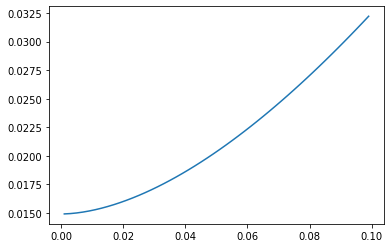

In [17]:
plt.plot(
    masas_bajas,
    np.abs((casimir_fuerza_lista_lineal_baja - casimir_exacto_lista_lineal_baja) / casimir_exacto_lista_lineal_baja))

# Para el regimen grande se comporta bien?